## 测试使用pysr库寻找向量函数

In [ ]:
import numpy as np
from pysr import PySRRegressor

# 定义目标向量函数
def target_function(X):
    f1 = X[:, 0]**2 + X[:, 1]**2  # f1(x, y) = x^2 + y^2
    f2 = np.sin(X[:, 0]) + np.cos(X[:, 1])  # f2(x, y) = sin(x) + cos(y)
    return np.column_stack((f1, f2))

# 生成样本数据
np.random.seed(42)
X = np.random.uniform(-5, 5, size=(1000, 2))  # 生成 1000 个样本，每个样本有两个特征 (x, y)
y = target_function(X)  # 计算目标向量函数的值

# 定义 PySR 模型
model = PySRRegressor(
    niterations=100,  # 迭代次数
    populations=30,  # 种群数量
    binary_operators=["+", "-", "*", "/"],  # 二元操作符
    unary_operators=["sin", "cos", "square"],  # 一元操作符
    elementwise_loss="L2DistLoss()",  # 损失函数
    parallelism='multithreading',  # 启用多线程
    verbosity=1,  # 显示详细日志 (verbosity 而不是 verbose)
)

# 拟合模型
print("Fitting model...")
model.fit(X, y)

# 输出最佳表达式
for i, expr in enumerate(model.equations_):
    print(f"Best Expression for output {i+1}: {expr}")

# 预测
y_pred = model.predict(X)

# 评估
mse = np.mean((y - y_pred) ** 2)
print(f"Mean Squared Error: {mse}")


In [ ]:
import sympy as sp

# 将 PySR 表达式转换为 sympy 表达式
sympy_expr1 = model.sympy()[0]  # 第一个输出变量的表达式
sympy_expr2 = model.sympy()[1]  # 第二个输出变量的表达式

# 打印 sympy 表达式
print(f"SymPy Expression for output 1: {sympy_expr1}")
print(f"SymPy Expression for output 2: {sympy_expr2}")


## 测试使用牛顿测地线数据运行

0.9909870784819198


C:\Users\19464\AppData\Local\Temp\ipykernel_9980\611568203.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


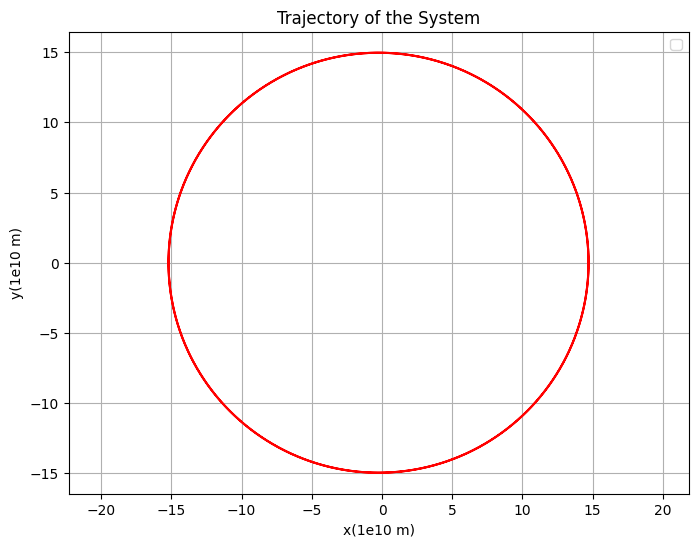

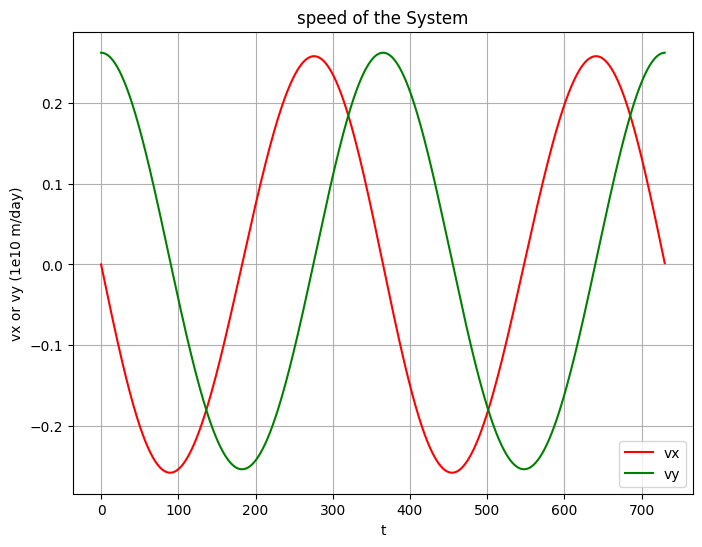

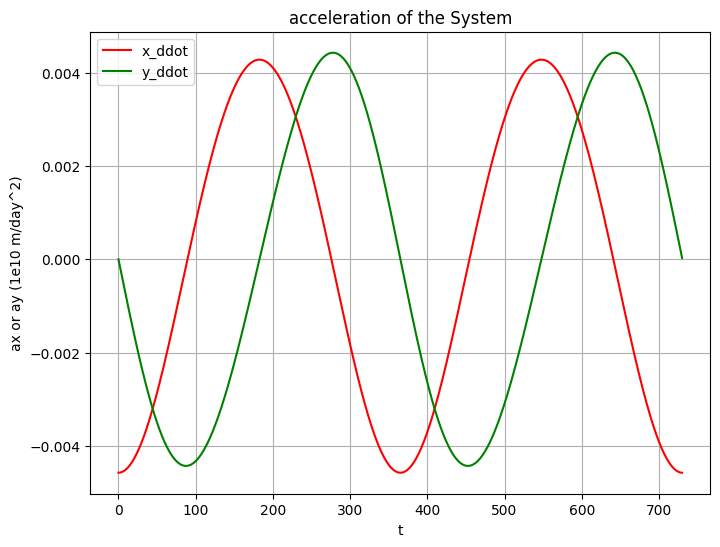

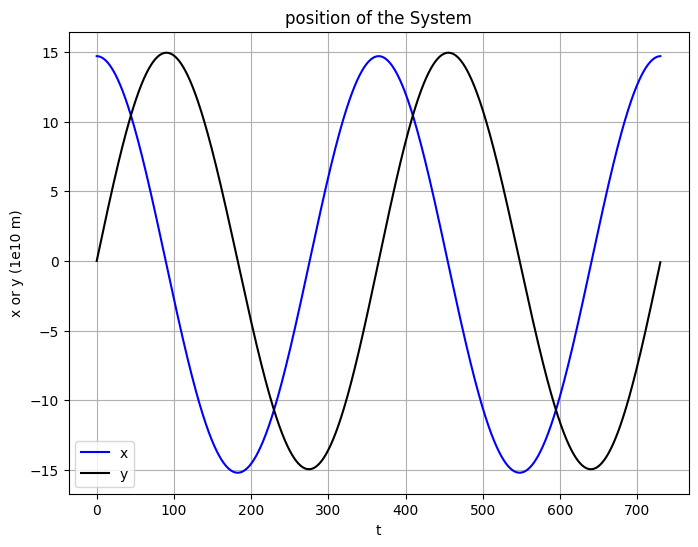

(8760,) (8760,) (8760,)


In [1]:
## 导入数据
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. 数据读取和预处理
# 加载数据
df = pd.read_csv('../improved_data/xy_orbit.csv')
array = df.to_numpy()
array = array.T
t = array[0]
yy = array[1:]

# 提取坐标和速度，注意单位一致
x , y, vx, vy = yy[0]/1e10, yy[1]/1e10,  yy[2]/1e10,  yy[3]/1e10

# 计算距离 r 和加速度分量
r = np.sqrt(x**2 + y**2)
G = 6.67430e-11 * 86400**2/1e30  # 引力常数, m^3 kg^-1 s^-2（调整单位）
M = 1.989e30  # 太阳质量
GM = G * M
print(GM)
# 加速度分量
x_ddot = -GM * x / r**3
y_ddot = -GM * y / r**3

plt.figure(figsize=(8, 6))
plt.plot(x,y, color = 'red')
plt.xlabel('x(1e10 m)')
plt.ylabel('y(1e10 m)')
plt.title('Trajectory of the System')
plt.legend()
plt.grid()
plt.axis('equal')  # 确保 x 和 y 轴比例相同
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(t,vx, color = 'red',label = 'vx')
plt.plot(t,vy, color = 'green',label = 'vy')
plt.xlabel('t')
plt.ylabel('vx or vy (1e10 m/day)')
plt.title('speed of the System')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(t,x_ddot, color = 'red',label = 'x_ddot')
plt.plot(t,y_ddot, color = 'green',label = 'y_ddot')
plt.xlabel('t')
plt.ylabel('ax or ay (1e10 m/day^2)')
plt.title('acceleration of the System')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(t,x, color = 'blue',label = 'x')
plt.plot(t,y, color = 'black',label = 'y')
plt.xlabel('t')
plt.ylabel('x or y (1e10 m)')
plt.title('position of the System')
plt.legend()
plt.grid()
plt.show()


print(x.shape,y.shape, r.shape)

In [3]:
import numpy as np
from pysr import PySRRegressor

# 目标输入
new_colum = np.full(x.shape,GM)
X = np.stack([x,y,r,new_colum],axis=0).T

# 目标输出
Y = np.stack([x_ddot,y_ddot],axis=0).T

print(X[:5],Y[:5])


# 定义 PySR 模型
model = PySRRegressor(
    niterations=100,  # 迭代次数
    populations=30,  # 种群数量
    binary_operators=["+", "-", "*", "/"],  # 二元操作符
    unary_operators=["sqrt", "square"],  # 一元操作符
    elementwise_loss="L2DistLoss()",  # 损失函数
    parallelism='multithreading',  # 启用多线程
    verbosity=1,  # 显示详细日志 (verbosity 而不是 verbose)
)

# 拟合模型
print("Fitting model...")
model.fit(X, Y)

# 输出最佳表达式
for i, expr in enumerate(model.equations_):
    print(f"Best Expression for output {i+1}: {expr}")

# 预测
y_pred = model.predict(X)

# 评估
mse = np.mean((Y - y_pred) ** 2)
print(f"Mean Squared Error: {mse}")


[[14.71        0.         14.71        0.99098708]
 [14.70998409  0.02181128 14.71000026  0.99098708]
 [14.70993638  0.04362252 14.71000106  0.99098708]
 [14.70985685  0.06543366 14.71000238  0.99098708]
 [14.70974551  0.08724466 14.71000424  0.99098708]] [[-4.57975923e-03 -0.00000000e+00]
 [-4.57975403e-03 -6.79064681e-06]
 [-4.57973843e-03 -1.35812767e-05]
 [-4.57971243e-03 -2.03718729e-05]
 [-4.57967604e-03 -2.71624184e-05]]
Fitting model...
Compiling Julia backend...


c:\anacoda\envs\pytorch\Lib\site-packages\pysr\sr.py:2766: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 4.600e+04
Progress: 284 / 6000 total iterations (4.733%)
════════════════════════════════════════════════════════════════════════════════════════════════════
Best equations for output 1
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           9.811e-06  1.594e+01  y₀ = 2.2029e-06
3           1.833e-08  3.141e+00  y₀ = x₀ * -0.00029573
5           6.117e-09  5.487e-01  y₀ = (x₀ * -0.0002961) + -0.0001106
7           2.746e-09  4.005e-01  y₀ = ((x₀ + 0.23146) / x₂) * -0.0044295
9           3.973e-11  2.118e+00  y₀ = (x₀ / x₂) / (-1.5815 - (x₂ * x₂))
11          7.934e-13  1.957e+00  y₀ = (x₀ / x₂) / ((-1.148 - (x₂ * x₂)) + -0.85614)
13          1.745e-13  7.573e-01  y₀ = ((x₀ / x₂) / (-0.54877 - ((x₂ + -0.038647) * x₂))) *...
                                        x₃
14          2.169e-19  1.351e+01  y₀ = ((x₀ * -1.0183) / x₃) / (x₂ / square((x₃ * x₃) / x₂

[ Info: Final populations:
[ Info: Output 1:
[ Info: Output 2:
[ Info: Results saved to:


Best Expression for output 1:    complexity          loss  \
0           1  9.810724e-06   
1           3  1.832692e-08   
2           5  6.116775e-09   
3           6  2.038495e-09   
4           7  2.035242e-09   
5           8  6.433047e-20   
6           9  6.369197e-20   
7          12  6.258660e-20   

                                            equation      score  \
0                                       2.2028728e-6   0.000000   
1                                x0 * -0.00029572585   3.141430   
2                   (x2 * 0.017785875) + -0.26609647   0.548668   
3                    x0 * (-0.06626423 / square(x2))   1.098823   
4             (x0 * -14.811068) / square(square(x2))   0.001597   
5             (x0 / x2) / (square(x2) / -0.99098706)  24.177602   
6              (x0 / x2) / (x2 * (x2 / -0.99098706))   0.009975   
7  (x0 / x2) / (((x3 / -0.98205537) * square(x2))...   0.005836   

                                     sympy_format  \
0                             2.2

In [ ]:
import sympy as sp

# 将 PySR 表达式转换为 sympy 表达式
sympy_expr1 = model.sympy()[0]  # 第一个输出变量的表达式
sympy_expr2 = model.sympy()[1]  # 第二个输出变量的表达式

# 打印 sympy 表达式
print(f"SymPy Expression for output 1: {sympy_expr1}")
print(f"SymPy Expression for output 2: {sympy_expr2}")


### 对于简单的形式，找到了及其正确的形式，比SINDY好太多
### 下面测试以下不给出GM来，观察是否能够找出（可以）

In [ ]:
import numpy as np
from pysr import PySRRegressor

# 目标输入
#new_colum = np.full(x.shape,GM)
X = np.stack([x,y,r],axis=0).T

# 目标输出
Y = np.stack([x_ddot,y_ddot],axis=0).T

print(X[:5],Y[:5])


# 定义 PySR 模型
model = PySRRegressor(
    niterations=100,  # 迭代次数
    populations=30,  # 种群数量
    binary_operators=["+", "-", "*", "/"],  # 二元操作符
    unary_operators=["sin", "cos", "square","sqrt"],  # 一元操作符
    elementwise_loss="L2DistLoss()",  # 损失函数
    parallelism='multithreading',  # 启用多线程
    verbosity=1,  # 显示详细日志 (verbosity 而不是 verbose)
)

# 拟合模型
print("Fitting model...")
model.fit(X, Y)

# 输出最佳表达式
for i, expr in enumerate(model.equations_):
    print(f"Best Expression for output {i+1}: {expr}")

# 预测
y_pred = model.predict(X)

# 评估
mse = np.mean((Y - y_pred) ** 2)
print(f"Mean Squared Error: {mse}")


In [ ]:
import sympy as sp

# 将 PySR 表达式转换为 sympy 表达式
sympy_expr1 = model.sympy()[0]  # 第一个输出变量的表达式
sympy_expr2 = model.sympy()[1]  # 第二个输出变量的表达式

# 打印 sympy 表达式
print(f"SymPy Expression for output 1: {sympy_expr1}")
print(f"SymPy Expression for output 2: {sympy_expr2}")


## 加大难度，除去R项

In [2]:
import numpy as np
from pysr import PySRRegressor

# 目标输入
#new_colum = np.full(x.shape,GM)
X = np.stack([x,y],axis=0).T

# 目标输出
Y = np.stack([x_ddot,y_ddot],axis=0).T

print(X[:5],Y[:5])


# 定义 PySR 模型
model = PySRRegressor(
    niterations=100,  # 迭代次数
    populations=30,  # 种群数量
    complexity_of_constants=10,
    binary_operators=["+", "-", "*", "/"],  # 二元操作符
    unary_operators=[ "square","sqrt"],  # 一元操作符
    elementwise_loss="L2DistLoss()",  # 损失函数
    parallelism='multithreading',  # 启用多线程
    verbosity=1,  # 显示详细日志 
)

# 拟合模型
print("Fitting model...")
model.fit(X, Y)

# 输出最佳表达式
for i, expr in enumerate(model.equations_):
    print(f"Best Expression for output {i+1}: {expr}")

# 预测
y_pred = model.predict(X)

# 评估
mse = np.mean((Y - y_pred) ** 2)
print(f"Mean Squared Error: {mse}")


Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython
[[14.71        0.        ]
 [14.70998409  0.02181128]
 [14.70993638  0.04362252]
 [14.70985685  0.06543366]
 [14.70974551  0.08724466]] [[-4.57975923e-03 -0.00000000e+00]
 [-4.57975403e-03 -6.79064681e-06]
 [-4.57973843e-03 -1.35812767e-05]
 [-4.57971243e-03 -2.03718729e-05]
 [-4.57967604e-03 -2.71624184e-05]]
Fitting model...
Compiling Julia backend...


d:\software_setup\anacoda\envs\pytorch\Lib\site-packages\pysr\sr.py:2737: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 5.340e+04
Progress: 411 / 6000 total iterations (6.850%)
════════════════════════════════════════════════════════════════════════════════════════════════════
Best equations for output 1
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
2           1.877e+04  7.971e+00  y₀ = square(x₁)
3           9.811e-06  1.594e+01  y₀ = x₁ - x₁
10          9.811e-06  3.406e-08  y₀ = 1.6781e-06
11          9.811e-06  1.848e-06  y₀ = (x₁ - ((x₁ * x₀) / x₀)) - (x₀ - x₀)
12          1.833e-08  6.283e+00  y₀ = x₀ * -0.00029573
14          1.833e-08  4.262e-06  y₀ = x₀ - (x₀ * 1.0003)
23          6.117e-09  1.219e-01  y₀ = -0.00011057 - (x₀ * 0.0002961)
25          1.410e-10  1.885e+00  y₀ = (x₀ * -0.097205) / (328.22 - x₀)
29          1.698e-12  1.105e+00  y₀ = x₀ * ((x₀ * -9.8913e-07) - ((x₀ * 0.00029666) / x₀))
──────────────────────────────────────────────────────────────────

[ Info: Final populations:
[ Info: Output 1:
[ Info: Output 2:
[ Info: Results saved to:


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.119e+02  1.594e+01  y₀ = x₁
3           9.811e-06  7.696e+00  y₀ = x₁ - x₁
7           9.811e-06  1.043e-06  y₀ = ((x₀ + x₁) - x₁) - x₀
9           9.810e-06  2.471e-05  y₀ = x₀ * (x₁ + ((x₀ - x₁) - x₀))
10          9.808e-06  2.040e-04  y₀ = square(x₀) * (x₁ - ((x₀ * x₁) / x₀))
11          9.806e-06  1.789e-04  y₀ = (x₀ * x₁) * (((x₁ + x₀) - x₀) - x₁)
12          1.833e-08  6.282e+00  y₀ = x₀ * -0.00029573
14          1.833e-08  4.262e-06  y₀ = x₀ - (x₀ * 1.0003)
16          1.832e-08  7.961e-05  y₀ = ((x₀ + -0.0002961) - x₀) * x₀
18          1.817e-08  4.249e-03  y₀ = x₀ - ((x₀ + (1.0003 - x₀)) * x₀)
20          1.798e-08  5.298e-03  y₀ = x₀ + (x₀ - (x₀ * (x₀ + (2.0003 - x₀))))
22          1.788e-08  2.730e-03  y₀ = (x₀ + (x₀ + x₀)) - ((x₀ + (3.0003 - x₀)) * x₀)
23          6.117e-09  1.073e+00  y₀ = (x₀ * -0.0002961) + -0.000110

In [3]:
print(model.get_params())

{'adaptive_parsimony_scaling': 1040.0, 'alpha': 3.17, 'annealing': False, 'autodiff_backend': None, 'batch_size': 50, 'batching': False, 'binary_operators': ['+', '-', '*', '/'], 'bumper': False, 'cluster_manager': None, 'complexity_mapping': None, 'complexity_of_constants': 10, 'complexity_of_operators': None, 'complexity_of_variables': None, 'constraints': None, 'crossover_probability': 0.0259, 'delete_tempfiles': True, 'denoise': False, 'deterministic': False, 'dimensional_constraint_penalty': None, 'dimensionless_constants_only': False, 'early_stop_condition': None, 'elementwise_loss': 'L2DistLoss()', 'expression_spec': None, 'extra_jax_mappings': None, 'extra_sympy_mappings': None, 'extra_torch_mappings': None, 'fast_cycle': False, 'fraction_replaced': 0.00036, 'fraction_replaced_hof': 0.0614, 'heap_size_hint_in_bytes': None, 'hof_migration': True, 'logger_spec': None, 'loss_function': None, 'max_evals': None, 'maxdepth': None, 'maxsize': 30, 'migration': True, 'model_selection': 

In [4]:
import sympy as sp

# 将 PySR 表达式转换为 sympy 表达式
sympy_expr1 = model.sympy()[0]  # 第一个输出变量的表达式
sympy_expr2 = model.sympy()[1]  # 第二个输出变量的表达式

# 打印 sympy 表达式
print(f"SymPy Expression for output 1: {sympy_expr1}")
print(f"SymPy Expression for output 2: {sympy_expr2}")


SymPy Expression for output 1: x0*0.088699035/(x0 - 1*299.5517)
SymPy Expression for output 2: x1*(-9.887434e-7*x0 - 0.0002964136)


## 测试一下horrizon的数据


In [ ]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. 数据读取和预处理
# 加载数据
df = pd.read_csv('./mercury_orbit_data.csv')
array = df.to_numpy()
array = array.T
t = array[0]
yy = array[1:]/1e10

# 提取坐标和速度，注意单位一致
x , y, z, vx, vy, vz = yy[0], yy[1], yy[2], yy[3], yy[4], yy[5]

# 计算距离 r 和加速度分量
r = np.sqrt(x**2 + y**2+z**2)
G = 6.67430e-11 * 86400**2/1e30  # 引力常数, m^3 kg^-1 s^-2（调整单位）
M = 1.989e30  # 太阳质量
GM = G * M

# 加速度分量
x_ddot = -GM * x / r**3
y_ddot = -GM * y / r**3
z_ddot = -GM * z / r**3

import numpy as np
from pysr import PySRRegressor

# 目标输入
#new_colum = np.full(x.shape,GM)
X = np.stack([x,y,z],axis=0).T

# 目标输出
Y = np.stack([x_ddot,y_ddot,z_ddot],axis=0).T


# 定义 PySR 模型
model = PySRRegressor(
    niterations=100,  # 迭代次数
    populations=30,  # 种群数量
    binary_operators=["+", "-", "*", "/"],  # 二元操作符
    unary_operators=["sin", "cos", "square"],  # 一元操作符
    elementwise_loss="L2DistLoss()",  # 损失函数
    parallelism='multithreading',  # 启用多线程
    verbosity=1,  # 显示详细日志 (verbosity 而不是 verbose)
)

# 拟合模型
print("Fitting model...")
model.fit(X, Y)

# 输出最佳表达式
for i, expr in enumerate(model.equations_):
    print(f"Best Expression for output {i+1}: {expr}")

# 预测
y_pred = model.predict(X)

# 评估
mse = np.mean((Y - y_pred) ** 2)
print(f"Mean Squared Error: {mse}")

In [ ]:
import sympy as sp

# 将 PySR 表达式转换为 sympy 表达式
sympy_expr1 = model.sympy()[0]  # 第一个输出变量的表达式
sympy_expr2 = model.sympy()[1]  # 第二个输出变量的表达式
sympy_expr3 = model.sympy()[2]  # 第三个输出变量的表达式

# 打印 sympy 表达式
print(f"SymPy Expression for output 1: {sympy_expr1}")
print(f"SymPy Expression for output 2: {sympy_expr2}")
print(f"SymPy Expression for output 3: {sympy_expr3}")


In [ ]:
X = np.stack([x,y,z,r],axis=0).T

model.fit(X, Y)

# 输出最佳表达式
for i, expr in enumerate(model.equations_):
    print(f"Best Expression for output {i+1}: {expr}")

# 预测
y_pred = model.predict(X)

# 评估
mse = np.mean((Y - y_pred) ** 2)
print(f"Mean Squared Error: {mse}")


sympy_expr1 = model.sympy()[0]  # 第一个输出变量的表达式
sympy_expr2 = model.sympy()[1]  # 第二个输出变量的表达式
sympy_expr3 = model.sympy()[2]  # 第三个输出变量的表达式

# 打印 sympy 表达式
print(f"SymPy Expression for output 1: {sympy_expr1}")
print(f"SymPy Expression for output 2: {sympy_expr2}")
print(f"SymPy Expression for output 3: {sympy_expr3}")